In [1]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd 
import numpy as np
import sklearn
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid'

Reading in the CSVs - Deaths are Drug-Related Deaths, 

In [2]:
# cdc_99_03 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death, 1999-2003.csv')
# cdc_04_09 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death 2004-2009.csv')



cdc_1999 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_1999.csv', delimiter='\t', encoding='utf-8')
cdc_2000 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2000.csv', delimiter='\t', encoding='utf-8')
cdc_2001 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2001.csv', delimiter='\t', encoding='utf-8')
cdc_2002 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2002.csv', delimiter='\t', encoding='utf-8')
cdc_2003 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2003.csv', delimiter='\t', encoding='utf-8')
cdc_2004 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2004.csv', delimiter='\t', encoding='utf-8')
cdc_2005 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2005.csv', delimiter='\t', encoding='utf-8')
cdc_2006 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2006.csv', delimiter='\t', encoding='utf-8')
cdc_2007 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2007.csv', delimiter='\t', encoding='utf-8')
cdc_2008 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2008.csv', delimiter='\t', encoding='utf-8')
cdc_2009 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2009.csv', delimiter='\t', encoding='utf-8')
cdc_2010 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2010.csv', delimiter='\t', encoding='utf-8')
cdc_2011 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2011.csv', delimiter='\t', encoding='utf-8')
cdc_2012 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2012.csv', delimiter='\t', encoding='utf-8')
cdc_2013 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2013.csv', delimiter='\t', encoding='utf-8')
cdc_2014_a = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2014_a-mississip.csv', delimiter='\t', encoding='utf-8')
cdc_2014_b = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2014_missouri-z.csv', delimiter='\t', encoding='utf-8')




In [3]:
def pct_clean(thing):
    thing = str(thing)
    x = thing.replace("%", "")
    return float(x)

def disqual(entry):
    disqual_list = ['nan', 'Not Applicable', np.NaN, 'NaN']
    if entry.isnull() == True:
        return False
    elif type(entry) == float:
        return True
    elif entry in disqual_list:
        return False
    else:
        return True
    
def int_erate(num):
    str(num).replace(".", "").replace(" ", "")
#     try:
    return float(num)
#     except:
#         return num


#Workign with 2014 first, in pieces
cdc_2014_a = cdc_2014_a[cdc_2014_a['Deaths'].isnull() == False]
cdc_2014_b = cdc_2014_b[cdc_2014_b['Deaths'].isnull() == False]


cols_cdc =['Notes','County','County Code','Ten-Year Age Groups',
    'Ten-Year Age Groups Code','Gender','Gender Code', 'Race',
       'Race Code', 'Hispanic Origin', 'Hispanic Origin Code', 'Deaths',
       'Population', 'Crude Rate', '% of Total Deaths']


cdc_2014_a.columns = cols_cdc
cdc_2014_b.columns = cols_cdc

cdc_2014 = pd.concat([cdc_2014_a, cdc_2014_b], axis=0)

#succesfully merged, all dfs imported

cdc_years = (cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999)

#checking what percent of counties I am dropping below

pre_disqual = 0
post_disqual = 0

for check_pre in cdc_years:
    pre_disqual = pre_disqual + len(check_pre)

    
cdc_1999 = cdc_1999[cdc_1999['Deaths'].isnull() == False]
cdc_2000 = cdc_2000[cdc_2000['Deaths'].isnull() == False]
cdc_2001 = cdc_2001[cdc_2001['Deaths'].isnull() == False]
cdc_2002 = cdc_2002[cdc_2002['Deaths'].isnull() == False]
cdc_2003 = cdc_2003[cdc_2003['Deaths'].isnull() == False]
cdc_2004 = cdc_2004[cdc_2004['Deaths'].isnull() == False]
cdc_2005 = cdc_2005[cdc_2005['Deaths'].isnull() == False]
cdc_2006 = cdc_2006[cdc_2006['Deaths'].isnull() == False]
cdc_2007 = cdc_2007[cdc_2007['Deaths'].isnull() == False]
cdc_2008 = cdc_2008[cdc_2008['Deaths'].isnull() == False]
cdc_2009 = cdc_2009[cdc_2009['Deaths'].isnull() == False]
cdc_2010 = cdc_2010[cdc_2010['Deaths'].isnull() == False]
cdc_2011 = cdc_2011[cdc_2011['Deaths'].isnull() == False]
cdc_2012 = cdc_2012[cdc_2012['Deaths'].isnull() == False]
cdc_2013 = cdc_2013[cdc_2013['Deaths'].isnull() == False]

years = [2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999]

lista = []

for ind, ex_df in enumerate([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999]):
    ex_df['year'] = years[ind]
    ex_df['pct_total_deaths'] = ex_df['% of Total Deaths'].apply(lambda x: pct_clean(x))
    ex_df['deaths'] = ex_df['Deaths'].apply(lambda x: float(x))
    ex_df['population'] = ex_df['Population'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    ex_df['crude_100k'] = ex_df['deaths']/(ex_df['population']/100000)
    
for check_post in cdc_years:
    post_disqual = post_disqual + len(check_post)

print(pre_disqual, post_disqual) #identical - do not appear to be dropping anything?


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

(18293, 18293)


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
###Used the following two lines to find all the remaining nulls individually, noted below

# cdc_2014['population'].isnull().sum()

# cdc_2010['population'][cdc_2010['population'].isnull()]

# cdc_1999.iloc[473,:] #new york county - White Male 45-54, Hisp = 'Not Stated'
# cdc_2000.iloc[473,:] #ibid
# cdc_2001.iloc[486,:] #null rows - kings --
# cdc_2002.iloc[579,:] #new york
# cdc_2009.iloc[1049,:] #harris county, TX

#going to drop the below rows, no way to determine if these ~10 per row deaths were hispanic or not

cdc_1999.drop(cdc_1999.index[473], inplace=1)
cdc_2000.drop(cdc_2000.index[473], inplace=1)
cdc_2001.drop(cdc_2001.index[486], inplace=1)
cdc_2002.drop(cdc_2002.index[579], inplace=1)
cdc_2009.drop(cdc_2009.index[1049], inplace=1)

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWar

## Important note about the above dropped data: 

I was forced to drop about 11 deaths per year in the nyc area, all 45-54 white, unclear if hispanic or not
and some in harris county tx

In [5]:
cdc_99_14 = pd.concat([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999], axis=0)
# cdc_99_03 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death, 1999-2003.csv', delimiter='"\t"')

cdc_99_14.drop(['Notes'], inplace=1) #need to fix this to drop notes



cdc_99_14.head()

,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate,% of Total Deaths,year,pct_total_deaths,deaths,population,crude_100k
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,11.0,19306,Unreliable,0.027%,2014,0.027,11.0,19306.0,56.977106
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,16.0,23590,Unreliable,0.039%,2014,0.039,16.0,23590.0,67.825350
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,27.0,22917,117.816,0.065%,2014,0.065,27.0,22917.0,117.816468
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,22.0,20774,105.902,0.053%,2014,0.053,22.0,20774.0,105.901608
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,26.0,21104,123.199,0.063%,2014,0.063,26.0,21104.0,123.199393


In [6]:
def county_clean(code):
    code = str(code)
    code = code.split(".")[0]
    return code


def state_extract(county):
    county = str(county)
    county = county.split(",")[1]
    return county
    

cdc_99_14['county_id'] = cdc_99_14['County Code'].apply(county_clean)
# cdc_99_14['county_id']
cdc_99_14['state'] = cdc_99_14['County'].apply(state_extract)

cdc_99_14['state']

0       AL
1       AL
2       AL
3       AL
4       AL
5       AL
6       AL
7       AL
8       AL
9       AL
10      AL
11      AL
12      AL
13      AL
14      AL
15      AK
16      AK
17      AZ
18      AZ
19      AZ
20      AZ
21      AZ
22      AZ
23      AZ
24      AZ
25      AZ
26      AZ
27      AZ
28      AZ
29      AZ
      ... 
624     WA
625     WA
626     WA
627     WA
628     WA
629     WA
630     WA
631     WA
632     WA
633     WA
634     WA
635     WA
636     WA
637     WA
638     WA
639     WA
640     WA
641     WA
642     WA
643     WA
644     WA
645     WI
646     WI
647     WI
648     WI
649     WI
650     WI
651     WI
652     WI
653     WI
Name: state, dtype: object

In [7]:
len(cdc_99_14)

17092

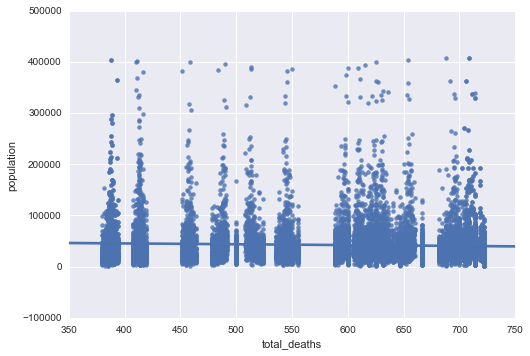

In [8]:
import seaborn as sns
cdc_99_14['total_deaths'] = (1/cdc_99_14['pct_total_deaths'])*cdc_99_14['deaths']

sns.regplot(cdc_99_14['total_deaths'], cdc_99_14['population'])

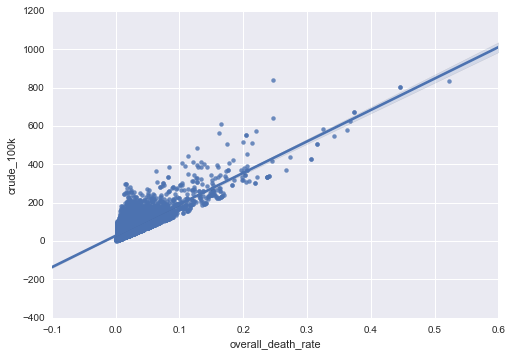

In [9]:
cdc_99_14['overall_death_rate'] = cdc_99_14['total_deaths']/cdc_99_14['population']
sns.regplot(cdc_99_14['overall_death_rate'],cdc_99_14['crude_100k'])

#strong correlation between overall death rate and crude rate per 100k people

In [10]:
from collections import defaultdict

# early_pops = defaultdict(int)

# early_pops[cdc_2003['County Code']] == cdc_2003['Population']


cdc_grouped_county_sum = cdc_99_14.groupby(by=['County'], sort=1).sum() # cant use crude_100k or pct_total_deaths on this
cdc_grouped_county_mean = cdc_99_14.groupby(by=['County'], sort=1).mean() # CAN use crude_100k or pct_total_deaths on this

cdc_grouped_county_sum.head()

,County Code,Deaths,year,pct_total_deaths,deaths,population,crude_100k,total_deaths,overall_death_rate
County,,,,,,,,,
"Ada County, ID",512032.0,382.0,64264,0.720,382.0,728411.0,1700.055807,17761.595550,0.788312
"Adams County, CO",416052.0,729.0,104433,1.300,729.0,930687.0,4114.295324,30103.350270,1.714104
"Alachua County, FL",24002.0,20.0,4014,0.035,20.0,20126.0,198.751517,1166.666667,0.116009
"Alameda County, CA",828138.0,2382.0,276970,4.431,2382.0,4430752.0,9124.246207,76937.611247,3.302389
"Albany County, NY",108003.0,32.0,6039,0.071,32.0,48277.0,200.238697,1451.425729,0.089207


In [11]:
cdc_grouped_county_mean.head()



#lets impute 2003 population data into each missing population file, assuming it didn't change too much in 4 years
#first test the difference between 2011, 2007 and 2003 population data to see if this is a safe assumption
#going to wait till all data merged

,County Code,Deaths,year,pct_total_deaths,deaths,population,crude_100k,total_deaths,overall_death_rate
County,,,,,,,,,
"Ada County, ID",16001.0,11.937500,2008.250000,0.022500,11.937500,22762.843750,53.126744,555.049861,0.024635
"Adams County, CO",8001.0,14.019231,2008.326923,0.025000,14.019231,17897.826923,79.121064,578.910582,0.032964
"Alachua County, FL",12001.0,10.000000,2007.000000,0.017500,10.000000,10063.000000,99.375759,583.333333,0.058005
"Alameda County, CA",6001.0,17.260870,2007.028986,0.032109,17.260870,32106.898551,66.117726,557.518922,0.023930
"Albany County, NY",36001.0,10.666667,2013.000000,0.023667,10.666667,16092.333333,66.746232,483.808576,0.029736


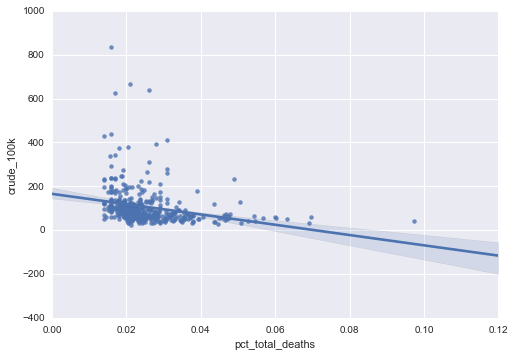

In [12]:
import seaborn as sns

sns.regplot(cdc_grouped_county_mean['pct_total_deaths'], cdc_grouped_county_mean['crude_100k'])
    

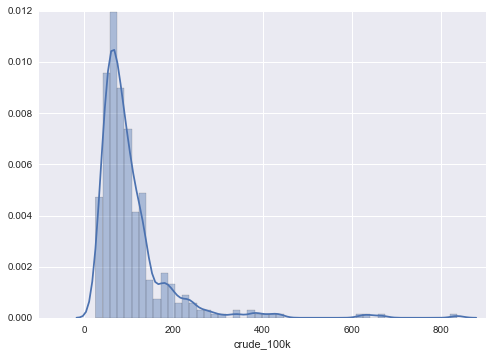

In [13]:
sns.distplot(cdc_grouped_county_mean['crude_100k'])

#histogram visualization of the average crude rate by county, averaged over the 15 years


In [14]:
cdc_grouped_county_mean['crude_100k'].tail()

County
Yellowstone County, MT    143.513203
Yolo County, CA           165.860132
York County, ME            70.137475
York County, PA            52.008418
York County, SC            80.945003
Name: crude_100k, dtype: float64

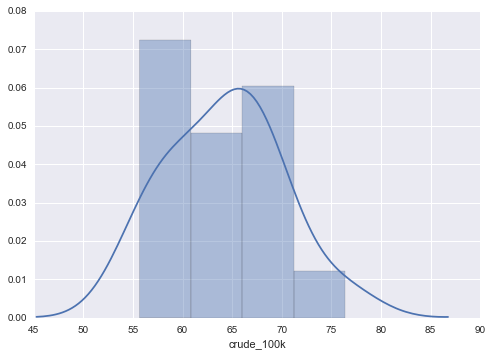

In [15]:
cdc_grouped_county_mean = cdc_99_14.groupby(by=['year'], sort=1).mean()
sns.distplot(cdc_grouped_county_mean['crude_100k'])

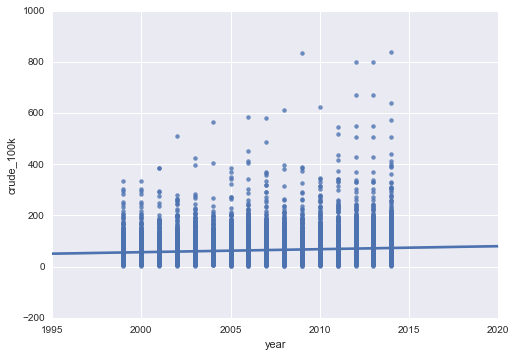

In [16]:
sns.regplot(cdc_99_14['year'], cdc_99_14['crude_100k'])

## Start using pivotables for getting demographic looks

need to be able to aggregate at the county level and find 
1)what proportion of each demographic group the population is
2) what proportion of deaths each demographic group represents

## Begin Time Series Analysis Here - ARIMA (no need for seasonal adjustment)



In [17]:
cdc_99_14

,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,...,% of Total Deaths,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,total_deaths,overall_death_rate
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,...,0.027%,2014,0.027,11.0,19306.0,56.977106,1073,AL,407.407407,0.021103
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,...,0.039%,2014,0.039,16.0,23590.0,67.825350,1073,AL,410.256410,0.017391
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,...,0.065%,2014,0.065,27.0,22917.0,117.816468,1073,AL,415.384615,0.018126
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,...,0.053%,2014,0.053,22.0,20774.0,105.901608,1073,AL,415.094340,0.019981
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,...,0.063%,2014,0.063,26.0,21104.0,123.199393,1073,AL,412.698413,0.019555
5,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,...,0.046%,2014,0.046,19.0,23482.0,80.913040,1073,AL,413.043478,0.017590
6,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,...,0.078%,2014,0.078,32.0,22839.0,140.111213,1073,AL,410.256410,0.017963
7,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,...,0.029%,2014,0.029,12.0,25098.0,47.812575,1073,AL,413.793103,0.016487
8,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,...,0.024%,2014,0.024,10.0,15872.0,63.004032,1073,AL,416.666667,0.026252
9,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,...,0.080%,2014,0.080,33.0,23237.0,142.014890,1073,AL,412.500000,0.017752


## Start making demographic, state dummies

1) classify for each demographic group whether they will be above the national mean (need dummies for each demo line)
2) classify for each demographic group whether they will increase from year before
3) regression for each county crude rate (need figures for proportion of demographic groups in county_

In [18]:
#for merging, need to clean county code


def county_cleaner(county):
    county = str(county).split(".")[0]
    if county[0]=='1':
        if len(county) == 4:
            county = '0' + county
    return county

cdc_99_14['county_code'] = cdc_99_14['County Code'].apply(county_cleaner)
cdc_99_14.head()


,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,...,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,total_deaths,overall_death_rate,county_code
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,...,2014,0.027,11.0,19306.0,56.977106,1073,AL,407.407407,0.021103,01073
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,...,2014,0.039,16.0,23590.0,67.825350,1073,AL,410.256410,0.017391,01073
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,...,2014,0.065,27.0,22917.0,117.816468,1073,AL,415.384615,0.018126,01073
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,...,2014,0.053,22.0,20774.0,105.901608,1073,AL,415.094340,0.019981,01073
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,...,2014,0.063,26.0,21104.0,123.199393,1073,AL,412.698413,0.019555,01073


In [19]:
# def demo_counter(df, age, gender_code, race, hisp):
#     for i in df.iloc[i,:]:
#         if df['Year Age Groups Code'] == age:
#             if df['Gender Code'] == gender_code:
#                 if df['Race'] == race:
#                     if df['Hispanic Origin']==hisp:
#                         df['demo_id'] = (age, gender_code, race, hisp)
#                         df['demo_pop'] = df.ix[i,'population']
#                         df['demo_deaths'] = df.ix[i,'deaths']
#                         df['demo_per_cap_100k'] = df.ix[i,'crude_100k']



    


# cdc_99_14['Wh_M_15-24_nH_deaths'] = 
# cdc_99_14['Wh_M_15-24_nH_population']

In [21]:

attempt_pivot =pd.pivot_table(cdc_99_14, values=['population', 'deaths'], index=['County','year', 'Ten-Year Age Groups Code', 'Gender Code', 'Race', 'Hispanic Origin'], aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All')
attempt_pivot #this won't work because it doesn't have zero values
#need to re-merge population data onto deaths because this population data does not add up
#appears that it accurately describes the subgroup, but does not sum properly

deaths  \
County          year Ten-Year Age Groups Code Gender Code Race  Hispanic Origin                  
Ada County, ID  1999 45-54                    M           White Not Hispanic or Latino    10.0   
                2000 45-54                    M           White Not Hispanic or Latino    10.0   
                2001 35-44                    M           White Not Hispanic or Latino    11.0   
                     45-54                    M           White Not Hispanic or Latino    11.0   
                2002 45-54                    M           White Not Hispanic or Latino    12.0   
                2003 35-44                    M           White Not Hispanic or Latino    12.0   
                2004 45-54                    M           White Not Hispanic or Latino    14.0   
                2005 45-54                    M           White Not Hispanic or Latino    15.0   
                2006 35-44                    F           White Not Hispanic or Latino    10.0   
                     45-54                    F           White Not Hispanic or Latino    10.0   
                2007 45-54                    F           White Not Hispanic or Latino    10.0   
                                              M           White Not Hispanic or Latino    12.0   
                     55-64                    M           White Not Hispanic or Latino    10.0   
                2008 45-54                    M           White Not Hispanic or Latino    15.0   
                     55-64                    M           White Not Hispanic or Latino    16.0   
                2009 45-54                    M           White Not Hispanic or Latino    15.0   
                     55-64                    M           White Not Hispanic or Latino    11.0   
                2010 45-54                    F           White Not Hispanic or Latino    12.0   
                                              M           White Not Hispanic or Latino    12.0   
                     55-64                    F           White Not Hispanic or Latino    11.0   
                                              M           White Not Hispanic or Latino    11.0   
                2011 45-54                    F           White Not Hispanic or Latino    10.0   
                                              M           White Not Hispanic or Latino    12.0   
                     55-64                    M           White Not Hispanic or Latino    12.0   
                2012 45-54                    M           White Not Hispanic or Latino    12.0   
                2013 45-54                    M           White Not Hispanic or Latino    12.0   
                2014 35-44                    F           White Not Hispanic or Latino    15.0   
                     45-54                    F           White Not Hispanic or Latino    11.0   
                                              M           White Not Hispanic or Latino    13.0   
                     55-64                    F           White Not Hispanic or Latino    11.0   
...                                                                                        ...   
York County, ME 2014 45-54                    M           White Not Hispanic or Latino    13.0   
                     55-64                    M           White Not Hispanic or Latino    10.0   
York County, PA 2001 35-44                    M           White Not Hispanic or Latino    10.0   
                2004 35-44                    M           White Not Hispanic or Latino    12.0   
                     45-54                    M           White Not Hispanic or Latino    12.0   
                2005 35-44                    M           White Not Hispanic or Latino    11.0   
                2006 45-54                    M           White Not Hispanic or Latino    13.0   
                2008 45-54                    M           White Not Hispanic or Latino    10.0   
                2010 45-54                    F           White Not Hi

## Decided to simplify this (at least for now)

1) Going to make two targets for model, deaths by county-year and death rate(per 100k) by county-year
2) Can easy go back and use, for example, white male deaths by county if of interest
3) Because I'm going to merge on demographic data for each county below, I don't necessarily need to retain the victims demographic for this analysis (although awesome for EDA and summary) 


In [ ]:



# write if statements, white NH, white H, black NH, etc...
cdc_99_14['male_deaths'] = #proportion of deaths
cdc_99_14['white_deaths'] #these can



In [ ]:
death_count_pivot =pd.pivot_table(cdc_99_14, values=['deaths'], index=['County','year'], aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All')
death_rate_pivot =pd.pivot_table(cdc_99_14, values=['crude_100k'], index=['County','year'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
death_rate_pivot
# simple_pivot['white_deaths'] = simple_pivot['deaths'][simple_pivot['Race']=="White"]

In [ ]:
death_count_pivot

## Loading population data by county
http://www.census.gov/popest/data/counties/asrh/2015/CC-EST2015-ALLDATA.html -15


In [ ]:
pop_15 = pd.read_csv("/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/Non_cdc_data/pop_data_15.csv")
pop_15

## Loading County level unemployment data (and workforce size by county) below

here is source:

http://www.bls.gov/lau/#cntyaa



In [ ]:
#Clean unemployment data
unemp_cols = ['unknown_code', 'state_code', 'cout_code', 'county_state', 'year', 'nan', 'working_pop', 'employed_pop', 'unemployed_pop', 'unemp_perc']

unemp_15 = pd.read_csv("/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/Non_cdc_data/unemp_15.csv")
unemp_14 = pd.read_csv("/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/Non_cdc_data/unemp_14.csv")

unemp_14 = unemp_14.iloc[3:,0:]
unemp_14.columns = unemp_cols
unemp_14 = unemp_14[2:]
unemp_14['county_code'] = unemp_14['state_code'] + unemp_14['cout_code'] # need to clean this



unemp_15 = unemp_15.iloc[3:,0:]
unemp_15.columns= unemp_cols
unemp_15 = unemp_15[2:]
unemp_15['county_code'] = unemp_15['state_code'] + unemp_15['cout_code']# need to clean this
unemp_15['county_code'] = unemp_15['county_code']
unemp_15['county_code'].value_counts()
#rinse and repeat

## Loading Poverty Data by COunty

http://www.census.gov/did/www/saipe/data/statecounty/data/2014.html



In [ ]:
pov_14 = pd.read_csv("/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/Non_cdc_data/pov_14.csv")
pov_14 = pov_14.iloc[2:,:]
pov_cols = pov_14.iloc[0]
pov_14 = pov_14.iloc[1:,:]
pov_14.columns = pov_cols
pov_14['county_code'] = pov_14['State FIPS Code'] + pov_14['County FIPS Code'] # need to clean this
pov_14

# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.rename(columns = new_header)

## Merging Datasets

For poverty and unemployment data, combine state FIPS Code and County Fips code for county code in CDC data

CDC county code needs to be transformed:
-remove float
-add 0 at the beginning of first ten states
-may also want to try by extracting county name from each row